In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import os  
from pathlib import Path

In [2]:
df = sns.load_dataset("penguins")
print(df.head())

  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]


In [3]:
my_path = Path("data")
my_path.mkdir(parents=True, exist_ok=True)

output_file = my_path / 'penguins.csv'
df.to_csv(output_file, index=False)

In [95]:
df = pd.read_csv("data/penguins.csv")
print(df.head())

  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]


## Exploratory Data Analysis

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [97]:
print(df.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [98]:
import importlib
import utils
importlib.reload(utils)
from utils import take_care_of_nan

In [99]:
print(df.isna().sum()[df.isna().sum() > 0])

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [100]:
cols = df.columns[df.isna().any()].tolist()
print(cols)
print("Columns with NaN:", cols)

for col in cols:
    df = take_care_of_nan(df, col)
    
print(df.head())

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
Columns with NaN: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen           39.10  ...              181.0       3750.0    Male
1  Adelie  Torgersen           39.50  ...              186.0       3800.0  Female
2  Adelie  Torgersen           40.30  ...              195.0       3250.0  Female
3  Adelie  Torgersen           44.45  ...              197.0       4050.0    Male
4  Adelie  Torgersen           36.70  ...              193.0       3450.0  Female

[5 rows x 7 columns]


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [102]:
print(df['sex'].value_counts())

sex
Male      179
Female    165
Name: count, dtype: int64


In [103]:
print(df['sex'].value_counts().values)

[179 165]


In [104]:
colors = ['#99ff99','#ffcc99']

In [105]:
# Set the theme
sns.set_theme(style="darkgrid")

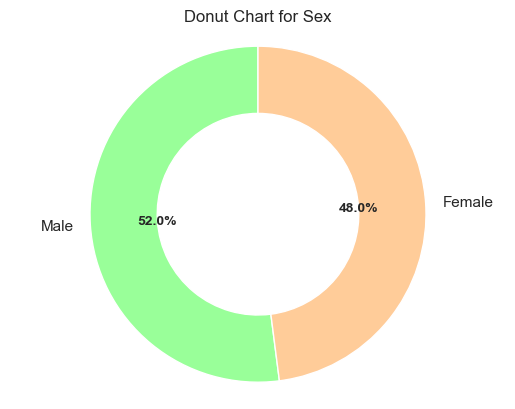

In [109]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    df['sex'].value_counts().values,
    labels=df['sex'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # 👈 controls the hole size
)

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')  

plt.setp(autotexts, size=10, weight="bold")
plt.title("Donut Chart for Sex")

images = Path("images")
images.mkdir(parents=True, exist_ok=True)
donut_path = images / 'donut_chart.png'

# Save as PNG
plt.savefig(donut_path, dpi=300, bbox_inches="tight")

plt.show()

In [108]:
print(df['species'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [110]:
colors = ['#ff9999','#66b3ff','#99ff99']

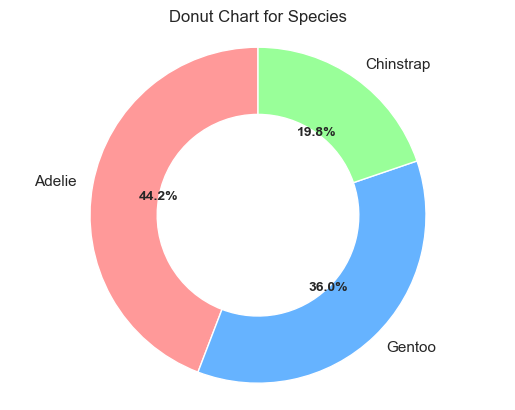

In [111]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    df['species'].value_counts().values,
    labels=df['species'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # 👈 controls the hole size
)

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')  

plt.setp(autotexts, size=10, weight="bold")
plt.title("Donut Chart for Species")

donut_path = images / 'donut_chart2.png'

# Save as PNG
plt.savefig(donut_path, dpi=300, bbox_inches="tight")

plt.show()

In [113]:
print(df['island'].value_counts())

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


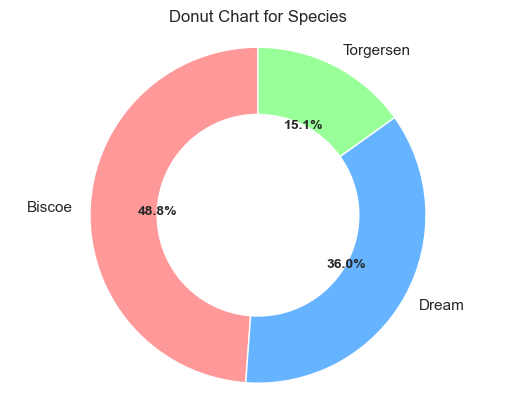

In [114]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    df['island'].value_counts().values,
    labels=df['island'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # 👈 controls the hole size
)

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')  

plt.setp(autotexts, size=10, weight="bold")
plt.title("Donut Chart for Species")

donut_path = images / 'donut_chart3.png'

# Save as PNG
plt.savefig(donut_path, dpi=300, bbox_inches="tight")

plt.show()

In [116]:
numerical_df = df.select_dtypes(exclude="object")
print(numerical_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0           39.10           18.7              181.0       3750.0
1           39.50           17.4              186.0       3800.0
2           40.30           18.0              195.0       3250.0
3           44.45           17.3              197.0       4050.0
4           36.70           19.3              193.0       3450.0


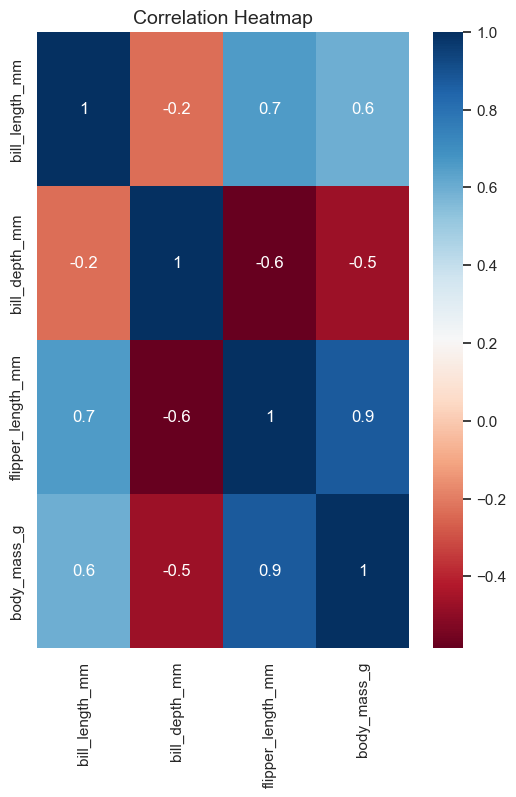

In [120]:
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="RdBu", fmt=".1g", ax=ax)

plt.title("Correlation Heatmap", fontsize=14)

heatmap_path = images / "heatmap.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")

plt.show()


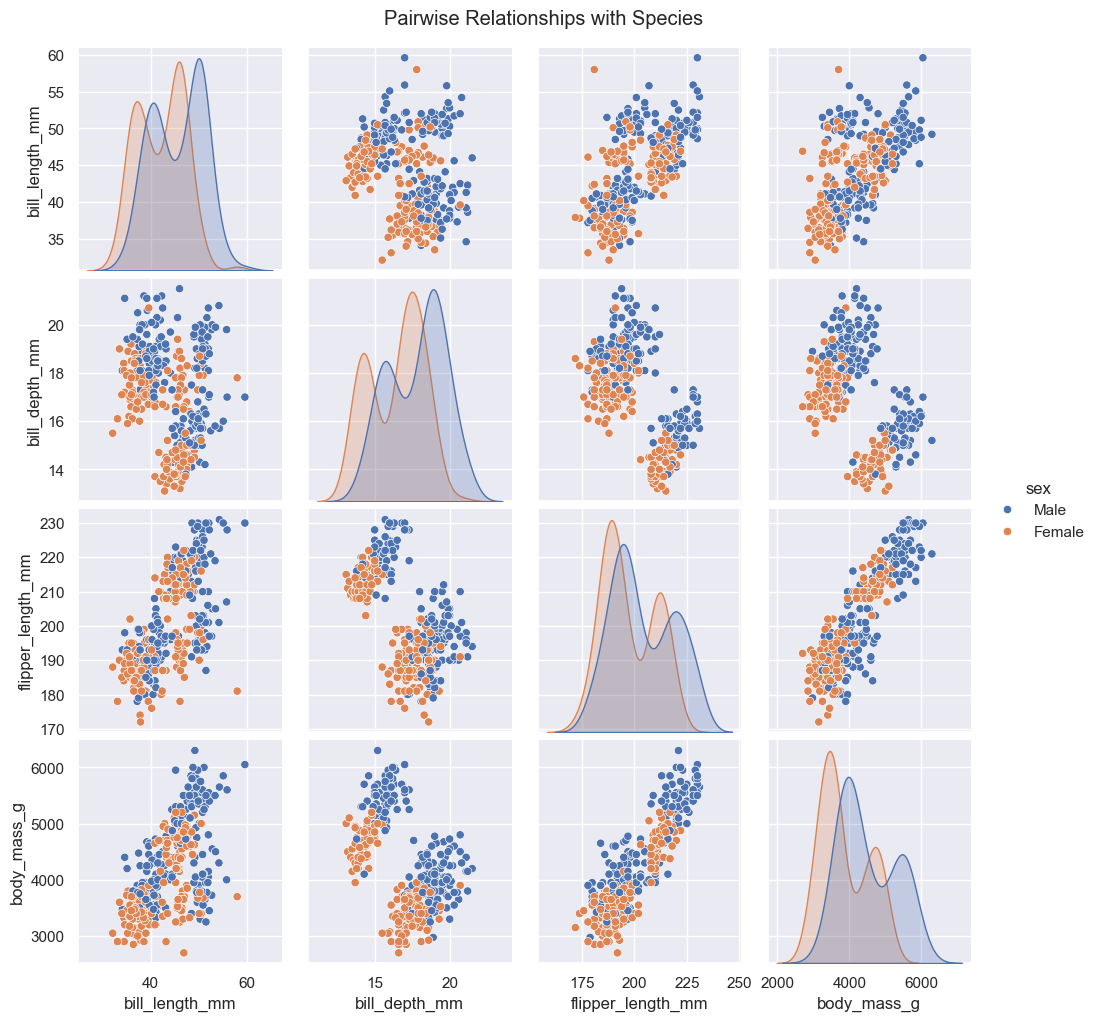

In [122]:
# Create pairplot (no ax argument)
g = sns.pairplot(
    df, 
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    hue="sex", 
    diag_kind="kde", 
    height=2.5
)

# Add a suptitle
g.fig.suptitle("Pairwise Relationships with Species", y=1.02)

# Save the entire figure
heatmap_path = images / "pairplot.png"
g.fig.savefig(heatmap_path, dpi=300, bbox_inches="tight")

plt.show()

In [126]:
print(df.groupby("sex")[['body_mass_g', "flipper_length_mm"]].median())

        body_mass_g  flipper_length_mm
sex                                   
Female       3650.0              193.0
Male         4300.0              200.0


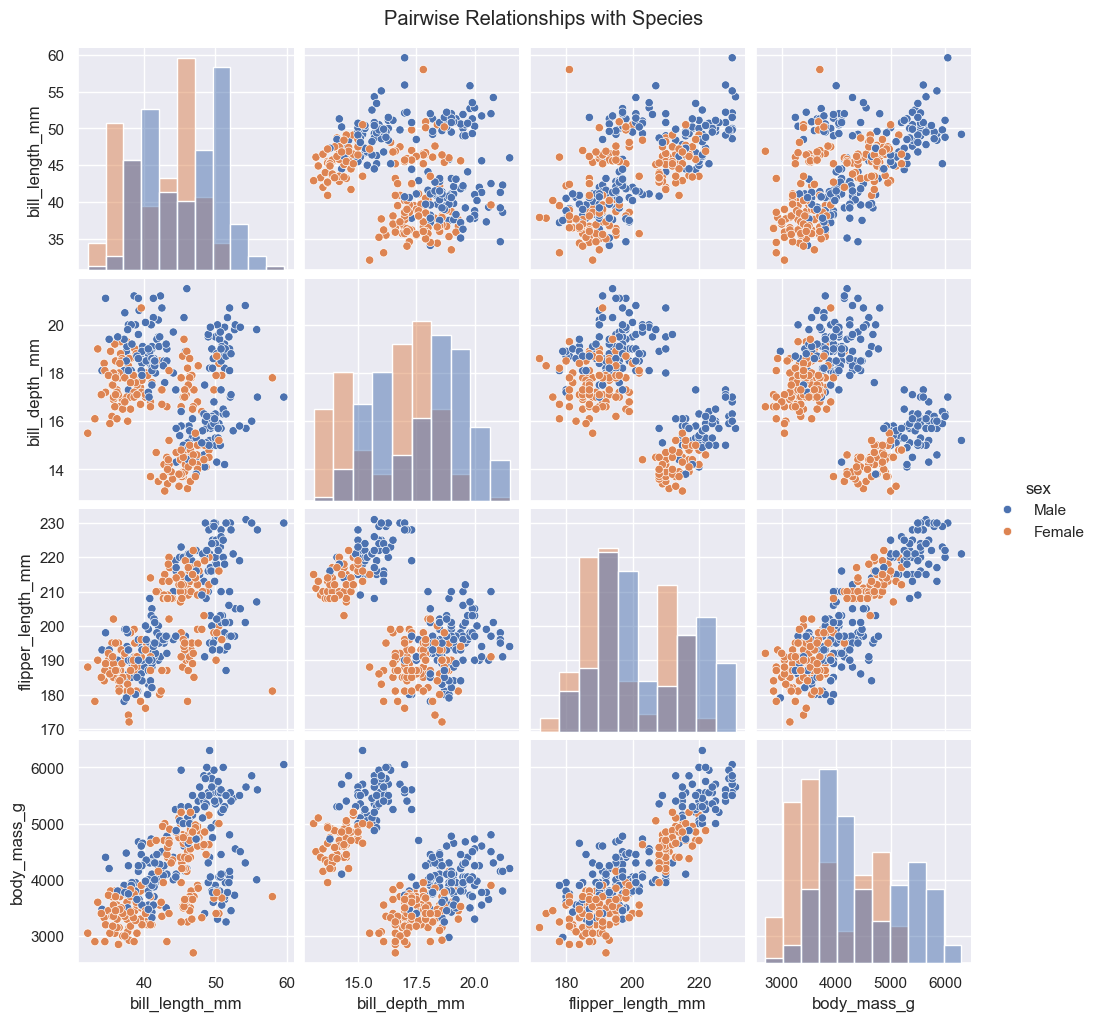

In [127]:
# Create pairplot (no ax argument)
g = sns.pairplot(
    df, 
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    hue="sex", 
    diag_kind="hist", 
    height=2.5
)

# Add a suptitle
g.fig.suptitle("Pairwise Relationships with Species", y=1.02)

# Save the entire figure
heatmap_path = images / "pairplot2.png"
g.fig.savefig(heatmap_path, dpi=300, bbox_inches="tight")

plt.show()

In [128]:
print(df.groupby(["species", "sex"])[['body_mass_g', "flipper_length_mm"]].median())

                  body_mass_g  flipper_length_mm
species   sex                                   
Adelie    Female       3400.0              188.0
          Male         4000.0              192.0
Chinstrap Female       3550.0              192.0
          Male         3950.0              200.5
Gentoo    Female       4700.0              212.0
          Male         5475.0              221.0


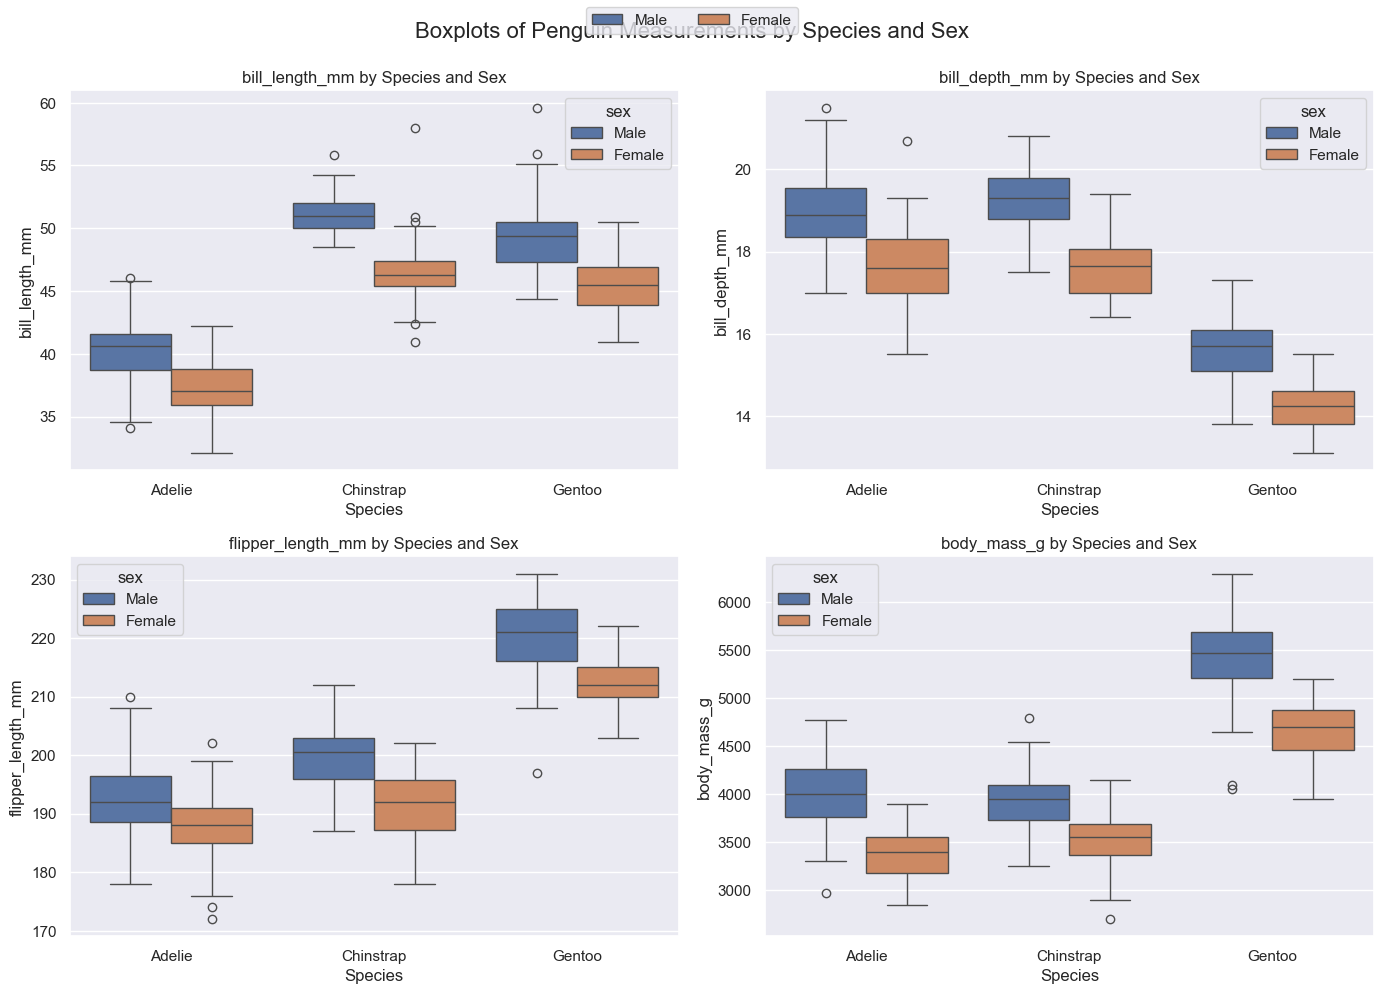

In [129]:
# Numerical columns to plot
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Create subplots (2 rows × 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=df,
        x="species",
        y=col,
        hue="sex",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Species and Sex")
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel(col)

# Place the legend outside the grid
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Boxplots of Penguin Measurements by Species and Sex", fontsize=16)

# ✅ Save to file
boxplot_path = images / "penguins_boxplots.png"
fig.savefig(boxplot_path, dpi=300, bbox_inches="tight")

plt.show()


In [131]:
print(cols)

cols = [col for col in cols if col != "sex"]
print(f"Cols after sex removal: {cols}")

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
Cols after sex removal: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


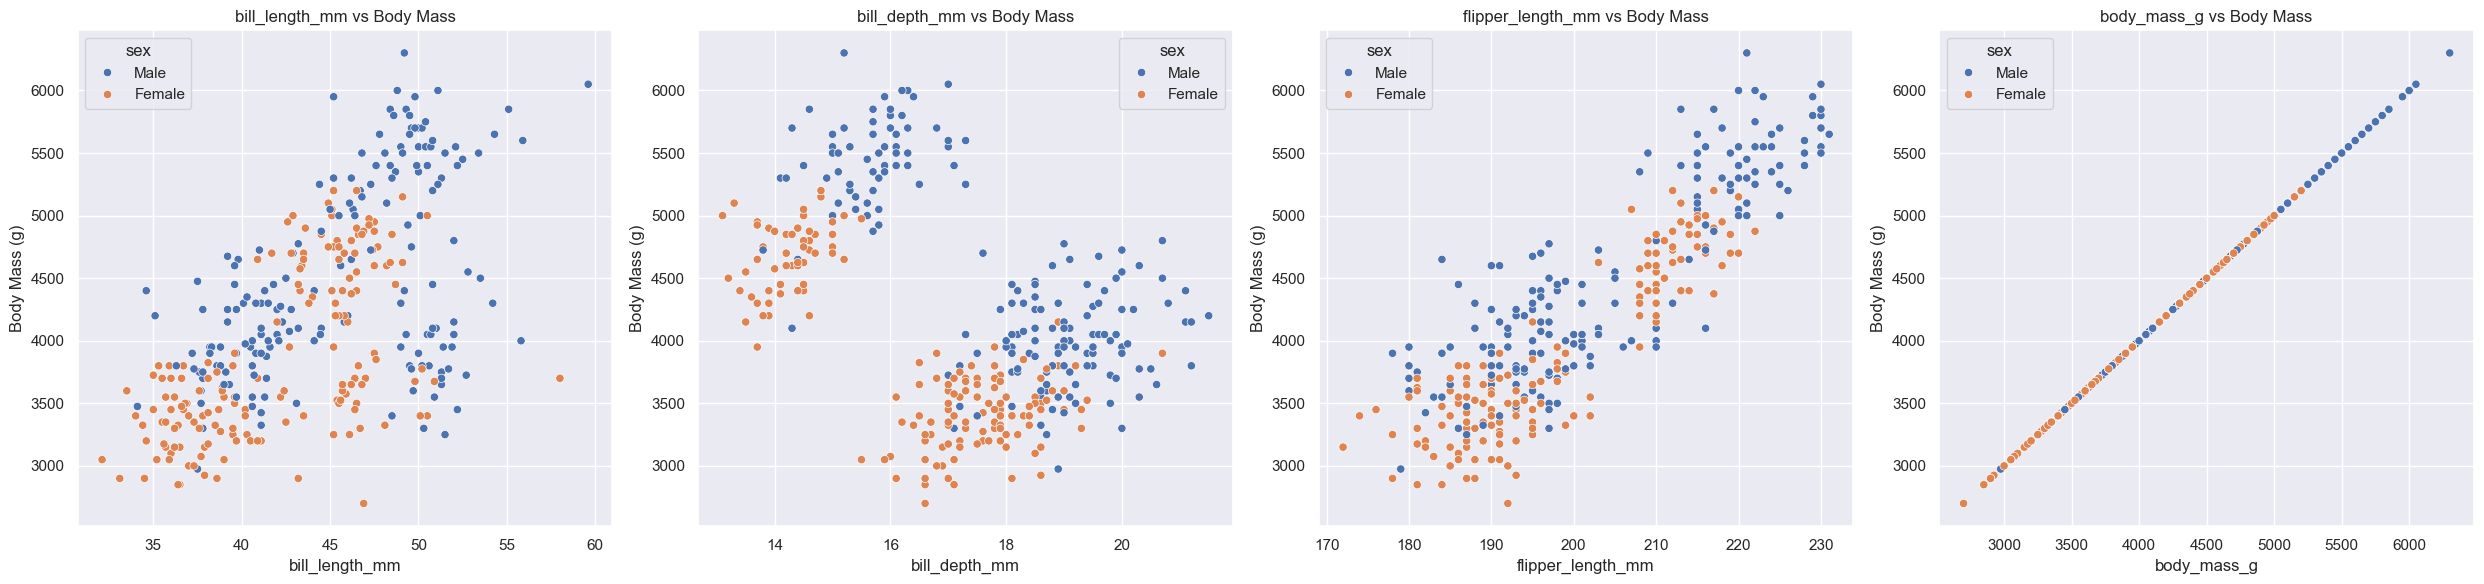

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))

for i, feature in enumerate(cols):
    sns.scatterplot(
        data=df,
        x=feature,
        y="body_mass_g",
        hue="sex",
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Body Mass")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Body Mass (g)")

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()

# ✅ Save the figure
scatterplot_path = images / "scatterplots_penguins.png"
fig.savefig(scatterplot_path, dpi=300, bbox_inches="tight")

plt.show()
